## Biclustering on simulated data
#### This is an effort built on Han Xu's exploratory analysis of biclustering packages in R, using simulated data

In [1]:
library(isa2)
library(biclust)
library(pheatmap)
library(dplyr)
library(RColorBrewer)
library(gridGraphics)
library(grid)
library(Matrix)
cols <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100)


Loading required package: MASS
Loading required package: grid
Loading required package: colorspace
Loading required package: lattice

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



#### Algorithm: ISA
The ISA is developed to ﬁnd biclusters (or modules as most of the ISA papers call them) that have correlated rows and columns. More precisely, the rows in the bicluster need to be only correlated across the columns of the bicluster and vice versa. (http://www2.unil.ch/cbg/homepage/ISA_tutorial.html)

In [ ]:
# Using ISA package self-generated examples
data <- isa.in.silico(200, 100, 10)
data.perm <- data[[1]][sample(nrow(data[[1]])), sample(ncol(data[[1]]))] # permutate the mmatrix

pheatmap(data[[1]], cluster_rows = F, cluster_cols = F,  main = 'ISA example')
g1 <- grid.grab()
pheatmap(data.perm, cluster_rows = F, cluster_cols = F, main = 'Permutated matrix')
g2 <- grid.grab()
pheatmap(data.perm, main = 'Permutated matrix with hclust')
g3 <- grid.grab()



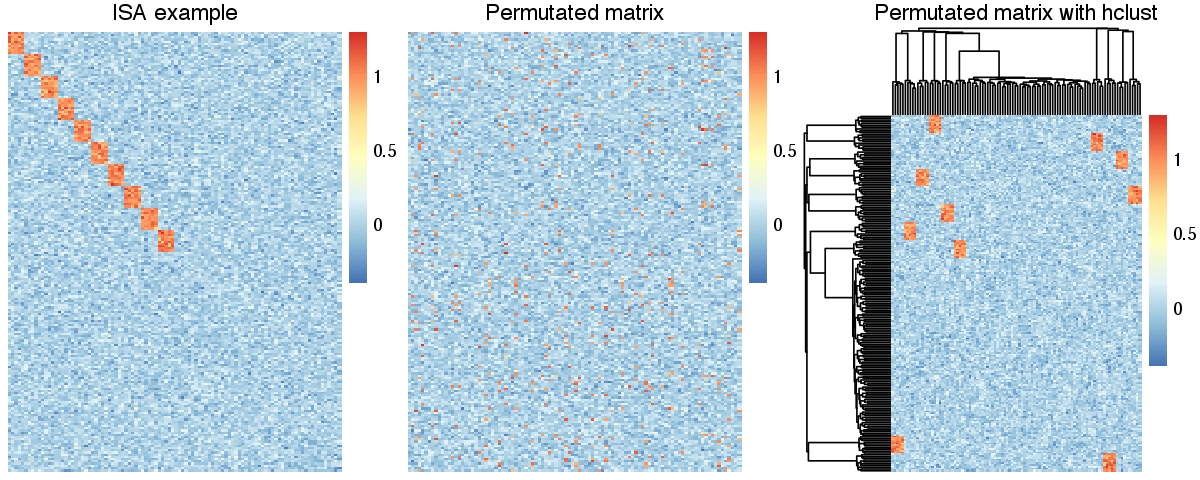

In [25]:
options(repr.plot.width = 10, repr.plot.height = 4)
grid.newpage()
lay <- grid.layout(nrow = 1, ncol = 3)
pushViewport(viewport(layout = lay))
grid.draw(editGrob(g1, vp=viewport(layout.pos.row = 1,layout.pos.col = 1, clip=TRUE)))
grid.draw(editGrob(g2, vp=viewport(layout.pos.row = 1, layout.pos.col = 2, clip=TRUE)))
grid.draw(editGrob(g3, vp=viewport(layout.pos.row = 1, layout.pos.col = 3, clip=TRUE)))
upViewport(1)

You can see that if the clusters do not overlap, biclustering is not necessary, as simple hclust of rows and columns separately can identify the clusters pretty well.


In [7]:
# using Han's simulated matrix
# no noise
mat.noNoise <- matrix(rep(0,2500), nrow=50)
rownames(mat.noNoise) <- as.character(1:50)
colnames(mat.noNoise) <- as.character(1:50)
mat.noNoise[1:10,1:20] <- matrix(rep(1,200),nrow=10)
mat.noNoise[6:30,31:35] <- matrix(rep(1,125),nrow=25)
mat.noNoise[36:45,16:40] <- matrix(rep(1,250),nrow=10)

# add backgroudn noise
mat.bgNoise <- matrix(rnorm(2500, sd = 0.5), nrow=50)
rownames(mat.bgNoise) <- as.character(1:50)
colnames(mat.bgNoise) <- as.character(1:50)
mat.bgNoise[1:10,1:20] <- matrix(rep(2,200),nrow=10)
mat.bgNoise[6:30,31:35] <- matrix(rep(-2,125),nrow=25)
mat.bgNoise[36:45,16:40] <- matrix(rep(2,250),nrow=10)

# add both background and foreground noise
mat.bfNoise <- matrix(rnorm(2500 ,sd = 0.5), nrow=50)
rownames(mat.bfNoise) <- as.character(1:50)
colnames(mat.bfNoise) <- as.character(1:50)
mat.bfNoise[1:10,1:20] <- matrix(rnorm(200,-2,0.5),nrow=10)
mat.bfNoise[6:30,31:35] <- matrix(rnorm(125,2,0.5),nrow=25)
mat.bfNoise[36:45,16:40] <- matrix(rnorm(250,-2,0.5),nrow=10)

mat <- mat.bfNoise

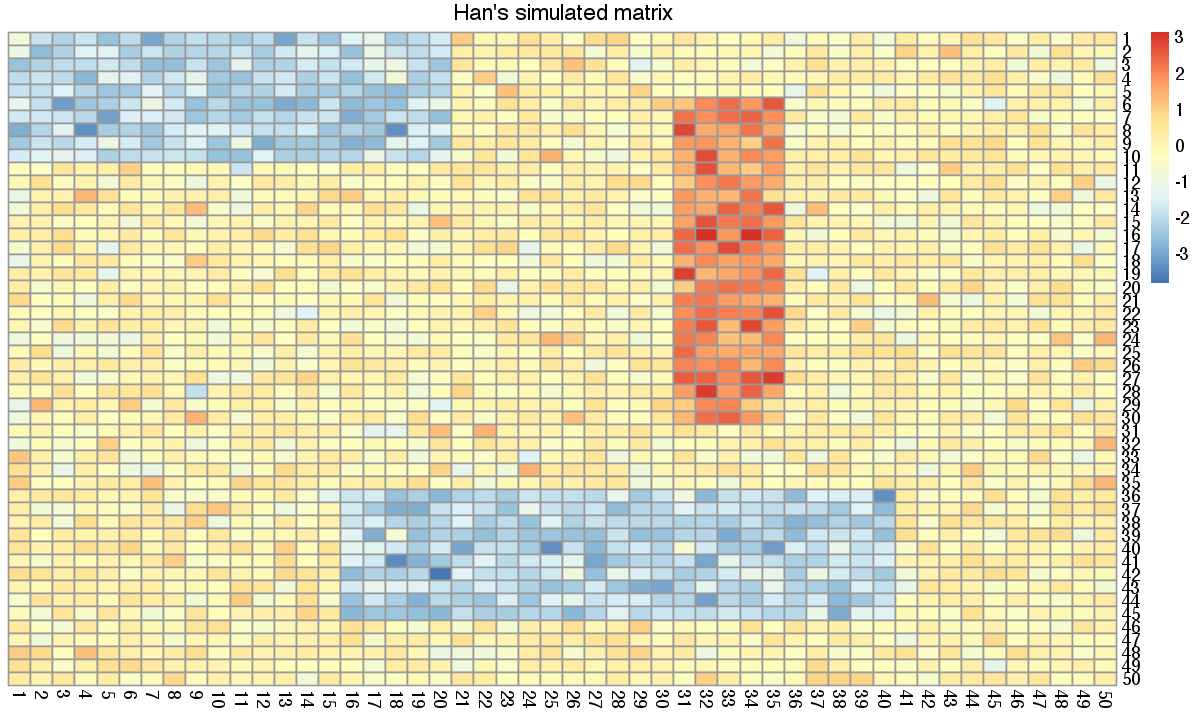

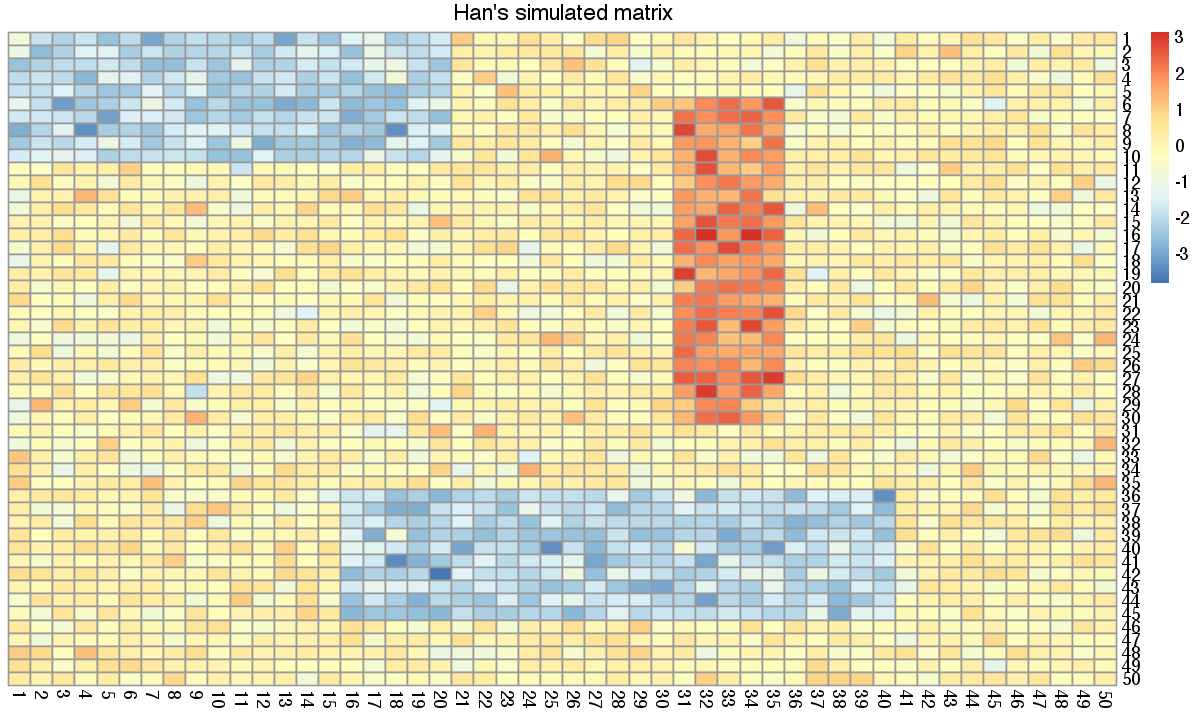

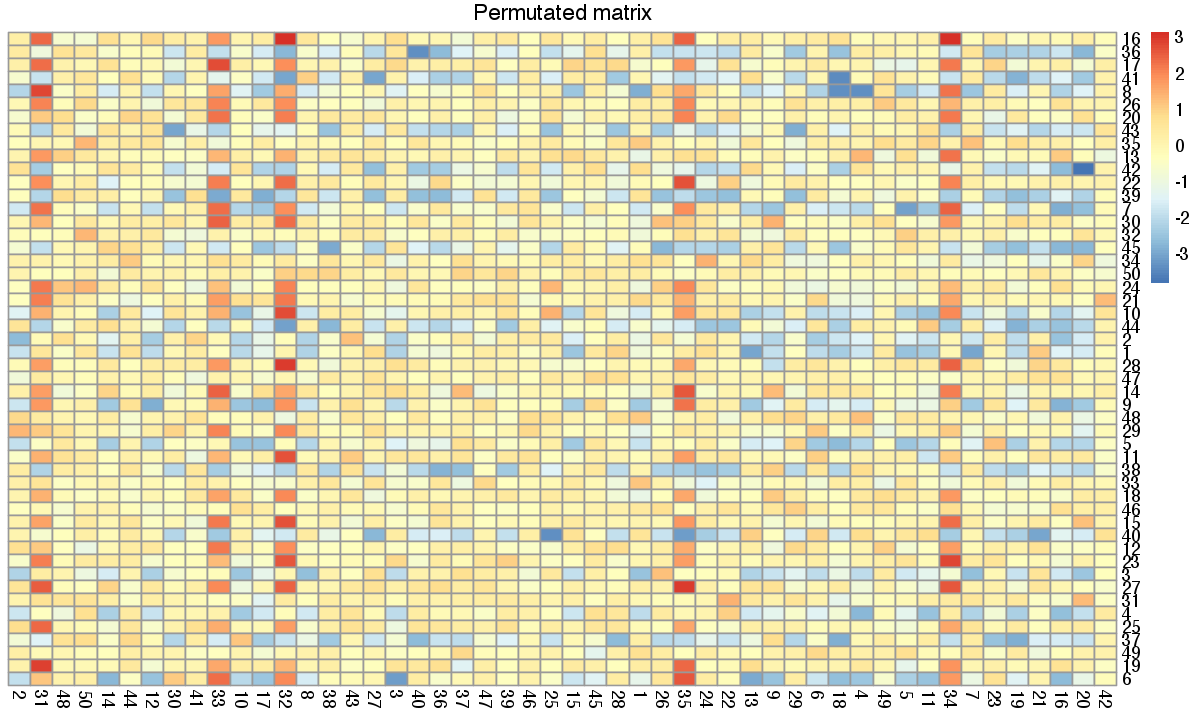

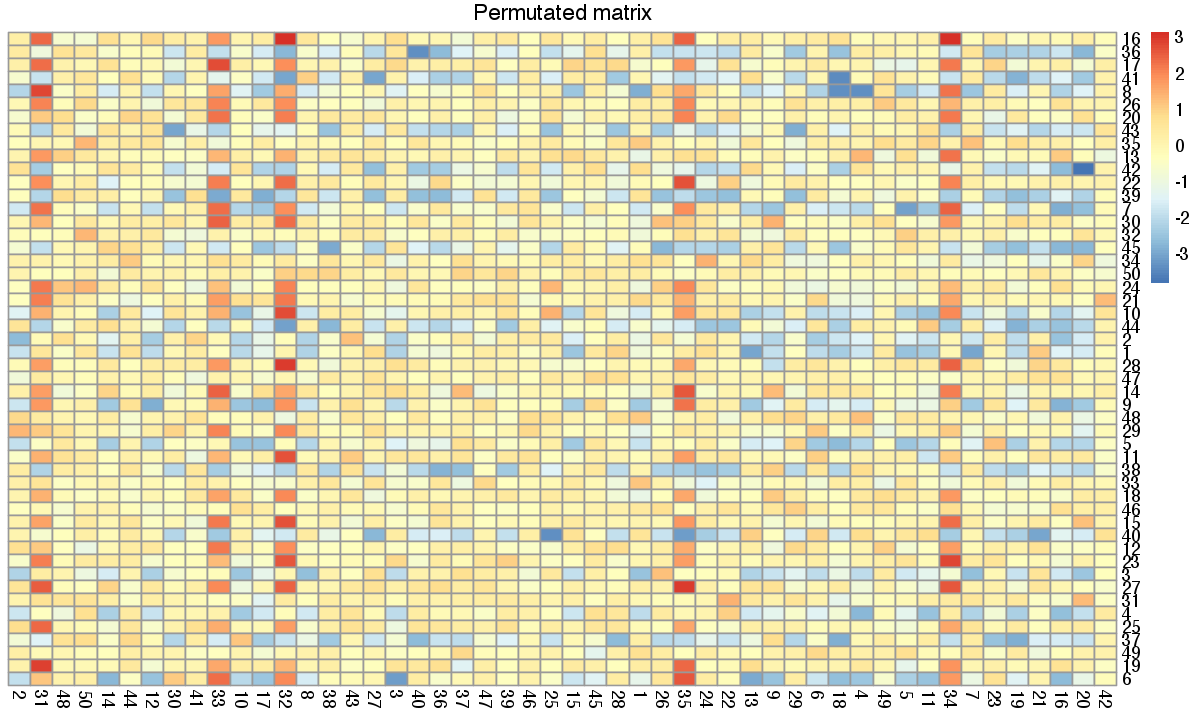

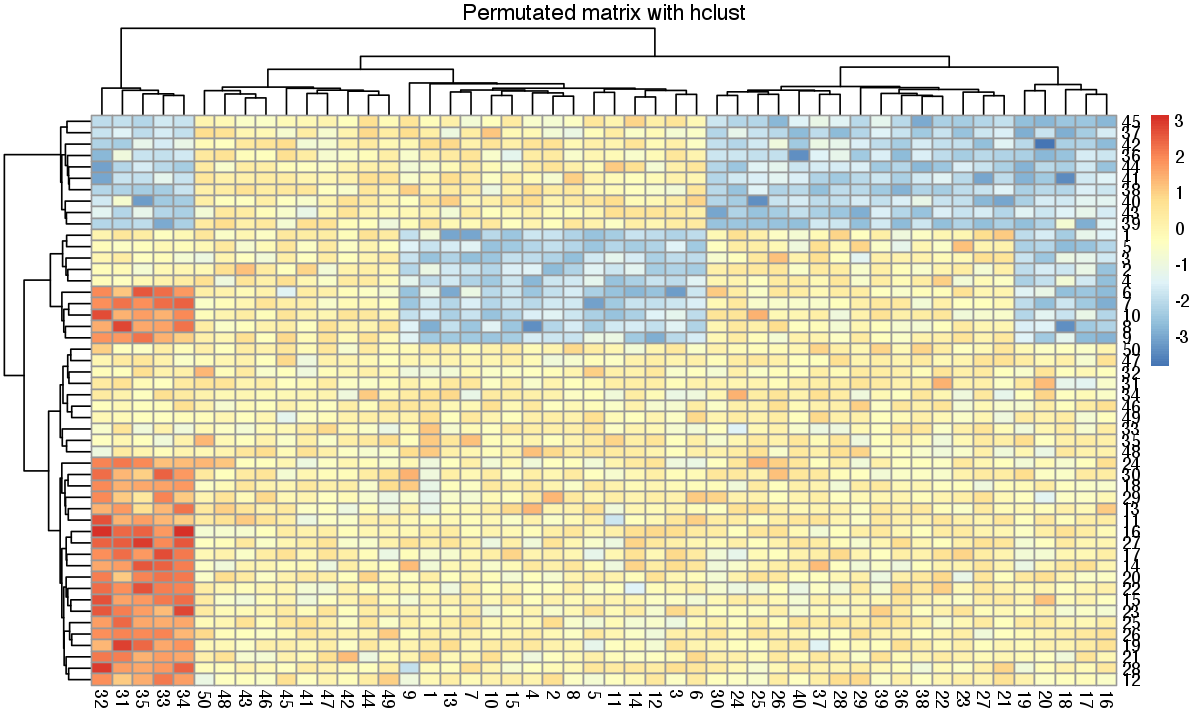

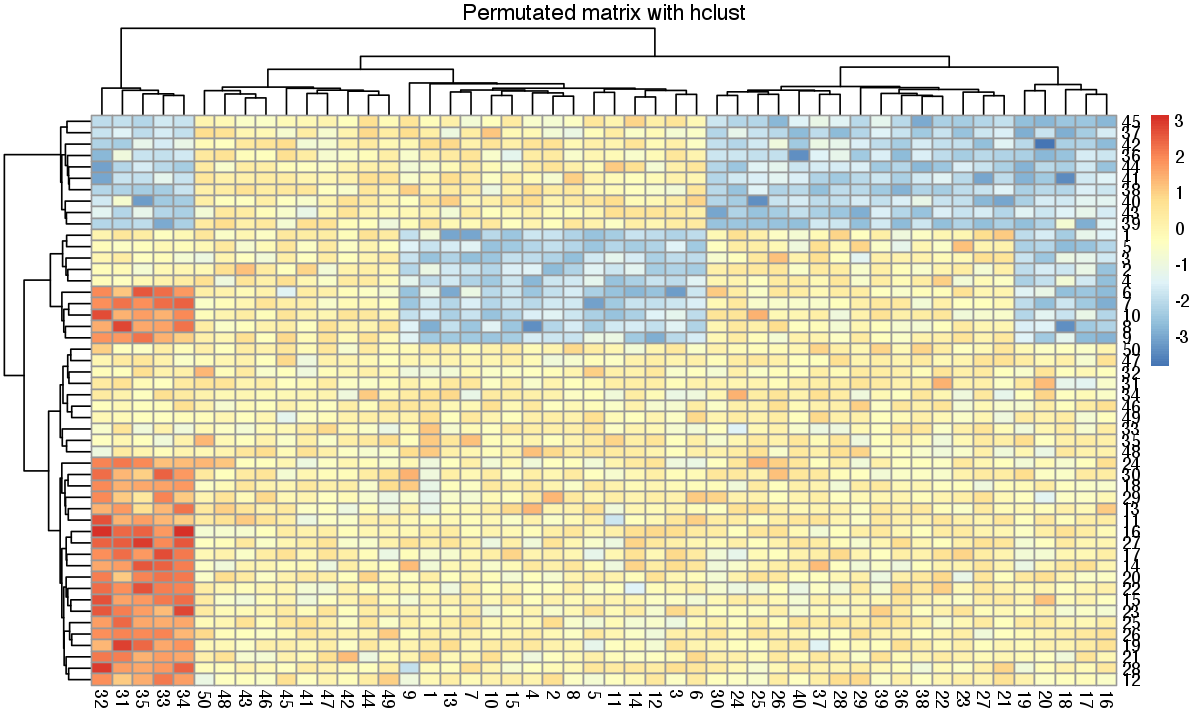

In [8]:
mat.perm <- mat[sample(nrow(mat)), sample(ncol(mat))] # permutate the mmatrix

pheatmap(mat, cluster_rows = F, cluster_cols = F,  main = 'Han\'s simulated matrix')
g1 <- grid.grab()
pheatmap(mat.perm, cluster_rows = F, cluster_cols = F, main = 'Permutated matrix')
g2 <- grid.grab()
pheatmap(mat.perm, main = 'Permutated matrix with hclust')
g3 <- grid.grab()


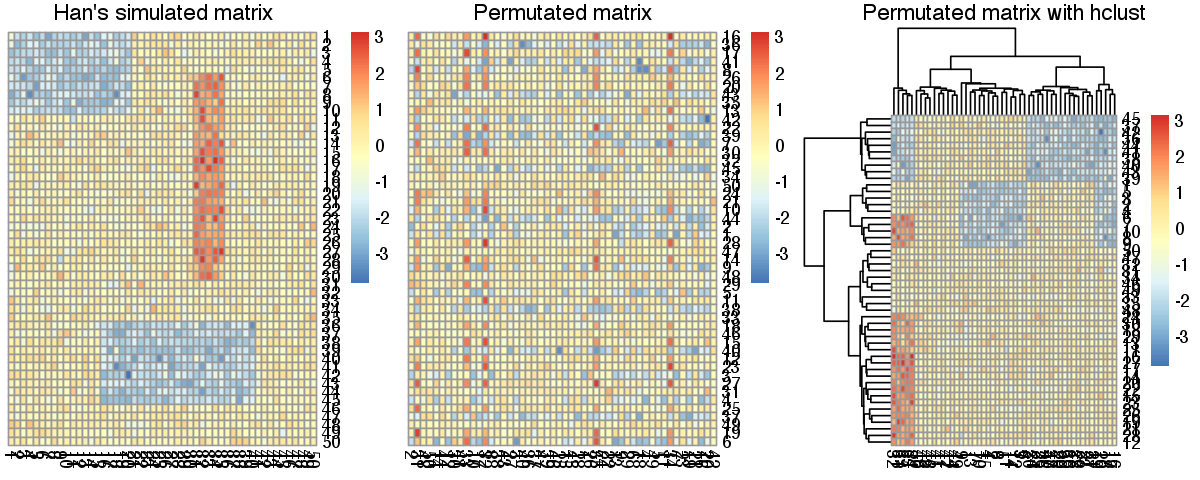

In [9]:
# no noise
options(repr.plot.width = 10, repr.plot.height = 4)
grid.newpage()
lay <- grid.layout(nrow = 1, ncol = 3)
pushViewport(viewport(layout = lay))
grid.draw(editGrob(g1, vp=viewport(layout.pos.row = 1,layout.pos.col = 1, clip=TRUE)))
grid.draw(editGrob(g2, vp=viewport(layout.pos.row = 1, layout.pos.col = 2, clip=TRUE)))
grid.draw(editGrob(g3, vp=viewport(layout.pos.row = 1, layout.pos.col = 3, clip=TRUE)))
upViewport(1)

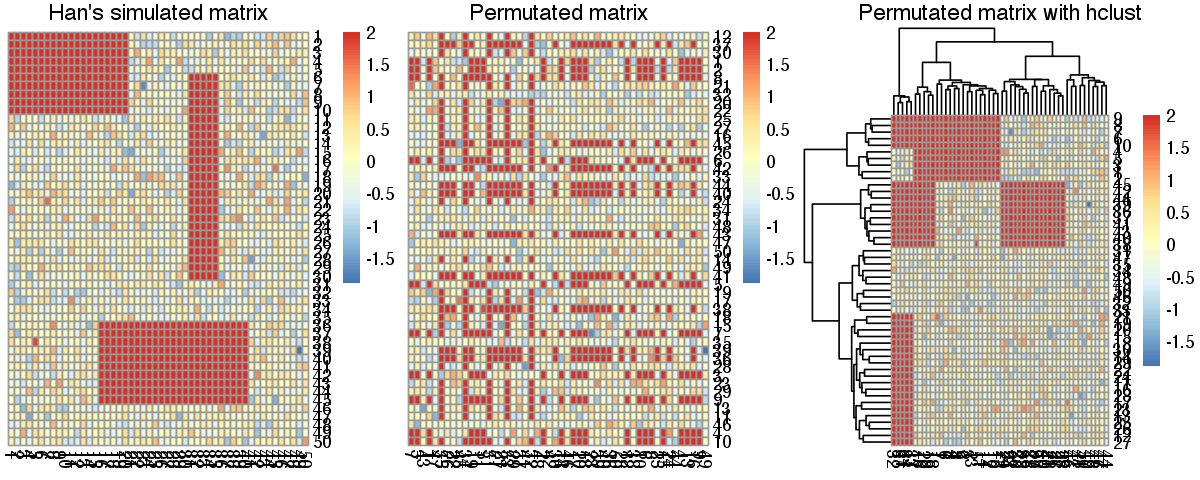

In [45]:
# with background noise
options(repr.plot.width = 10, repr.plot.height = 4)
grid.newpage()
lay <- grid.layout(nrow = 1, ncol = 3)
pushViewport(viewport(layout = lay))
grid.draw(editGrob(g1, vp=viewport(layout.pos.row = 1,layout.pos.col = 1, clip=TRUE)))
grid.draw(editGrob(g2, vp=viewport(layout.pos.row = 1, layout.pos.col = 2, clip=TRUE)))
grid.draw(editGrob(g3, vp=viewport(layout.pos.row = 1, layout.pos.col = 3, clip=TRUE)))
upViewport(1)

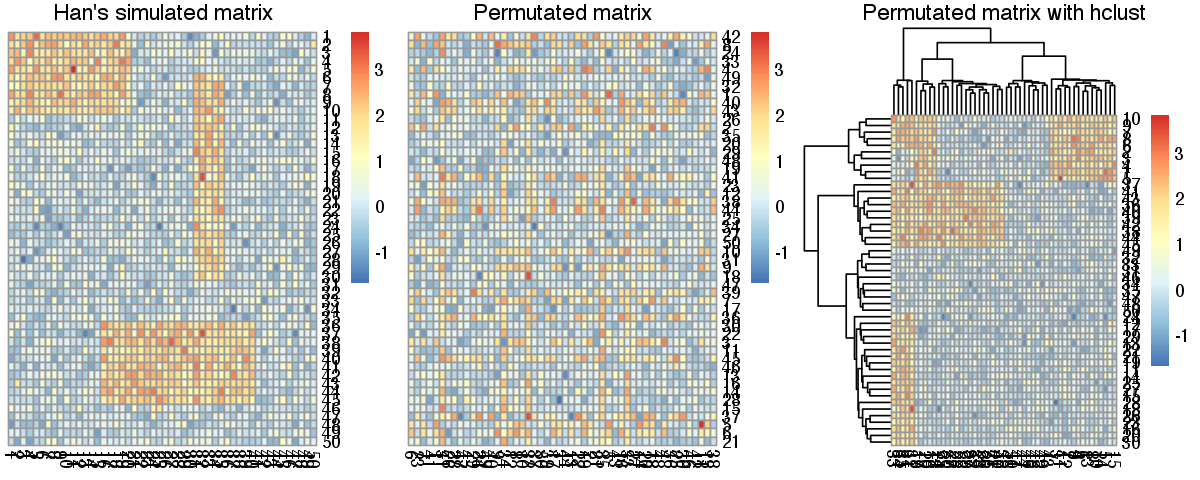

In [48]:
# with both bg and fg noise
options(repr.plot.width = 10, repr.plot.height = 4)
grid.newpage()
lay <- grid.layout(nrow = 1, ncol = 3)
pushViewport(viewport(layout = lay))
grid.draw(editGrob(g1, vp=viewport(layout.pos.row = 1,layout.pos.col = 1, clip=TRUE)))
grid.draw(editGrob(g2, vp=viewport(layout.pos.row = 1, layout.pos.col = 2, clip=TRUE)))
grid.draw(editGrob(g3, vp=viewport(layout.pos.row = 1, layout.pos.col = 3, clip=TRUE)))
upViewport(1)

In [10]:
# run isa algorithm
modules1 <- isa(mat.noNoise, direction = 'down')
modules2 <- isa(mat.bgNoise, direction = 'down')
modules3 <- isa(mat.bfNoise, direction = 'down')

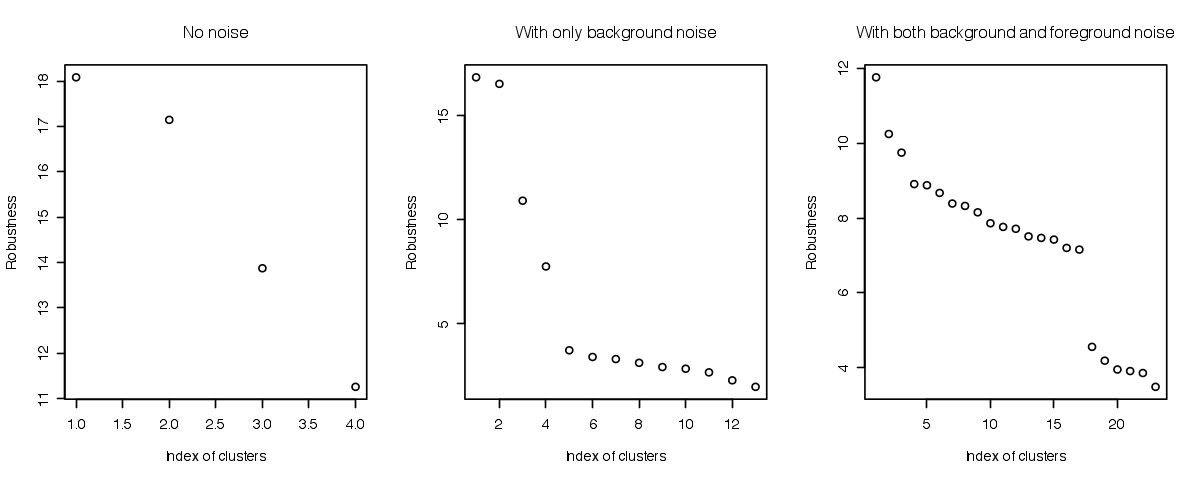

In [11]:
# robustness of clusters
robs1 <- modules1$seeddata$rob
robs2 <- modules2$seeddata$rob
robs3 <- modules3$seeddata$rob

options(repr.plot.width = 10, repr.plot.height = 4)
layout(matrix(c(1,1,2,2,3,3), 2, 3))
plot(robs1[order(robs1, decreasing = T)], xlab = 'Index of clusters', ylab = 'Robustness', 
         main = 'No noise')
plot(robs2[order(robs2, decreasing = T)], xlab = 'Index of clusters', ylab = 'Robustness', 
         main = 'With only background noise')
plot(robs3[order(robs3, decreasing = T)], xlab = 'Index of clusters', ylab = 'Robustness', 
         main = 'With both background and foreground noise')

In [12]:
# helper function to plot isa result
plot_isa <- function(modules, mx, num.modules = 5, main){
    # modules: isa output
    # mx: original matrix
    plotModules(modules, data = mx, 
                to.plot = order(modules$seeddata$rob, decreasing = T)[1:num.modules],                
                names = c('Input matrix', paste('Rank',seq(1:num.modules),'cluster')),
                main = main)
}

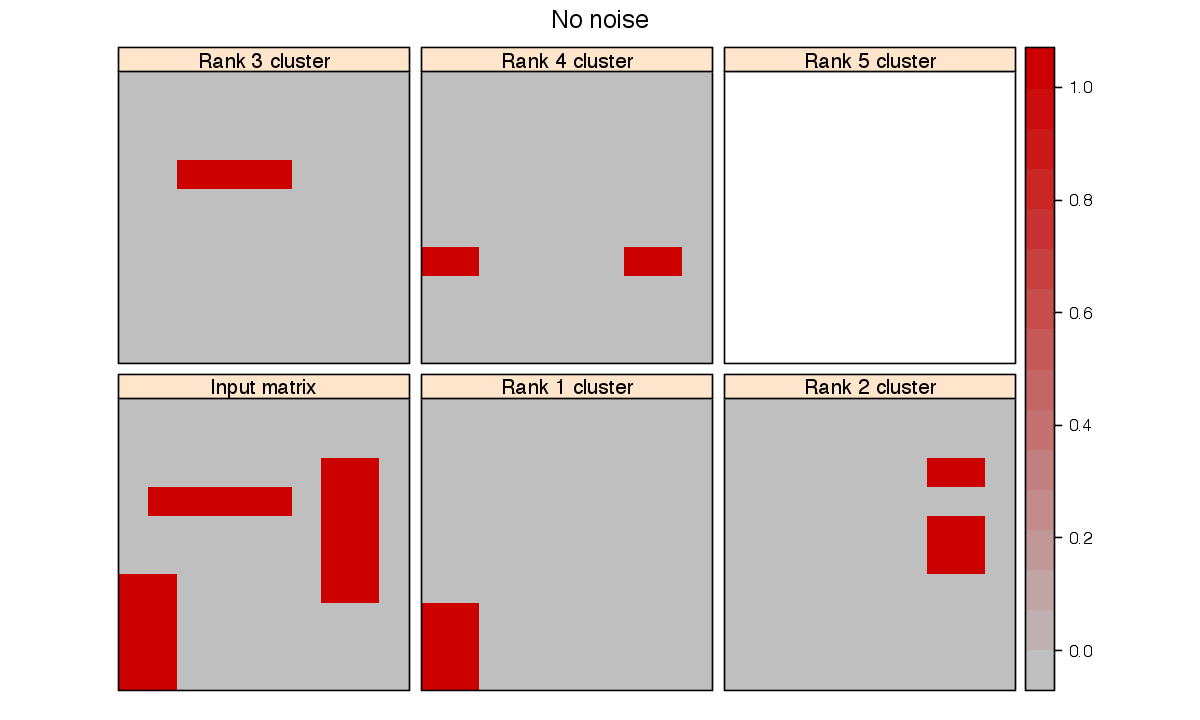

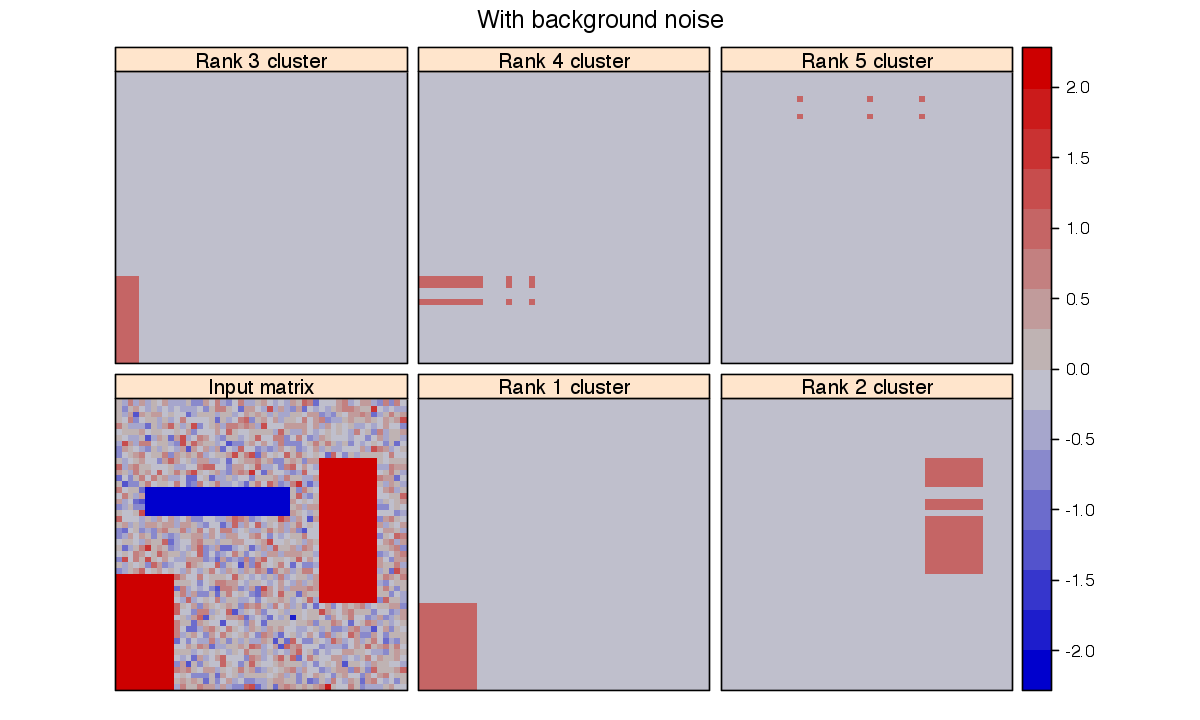

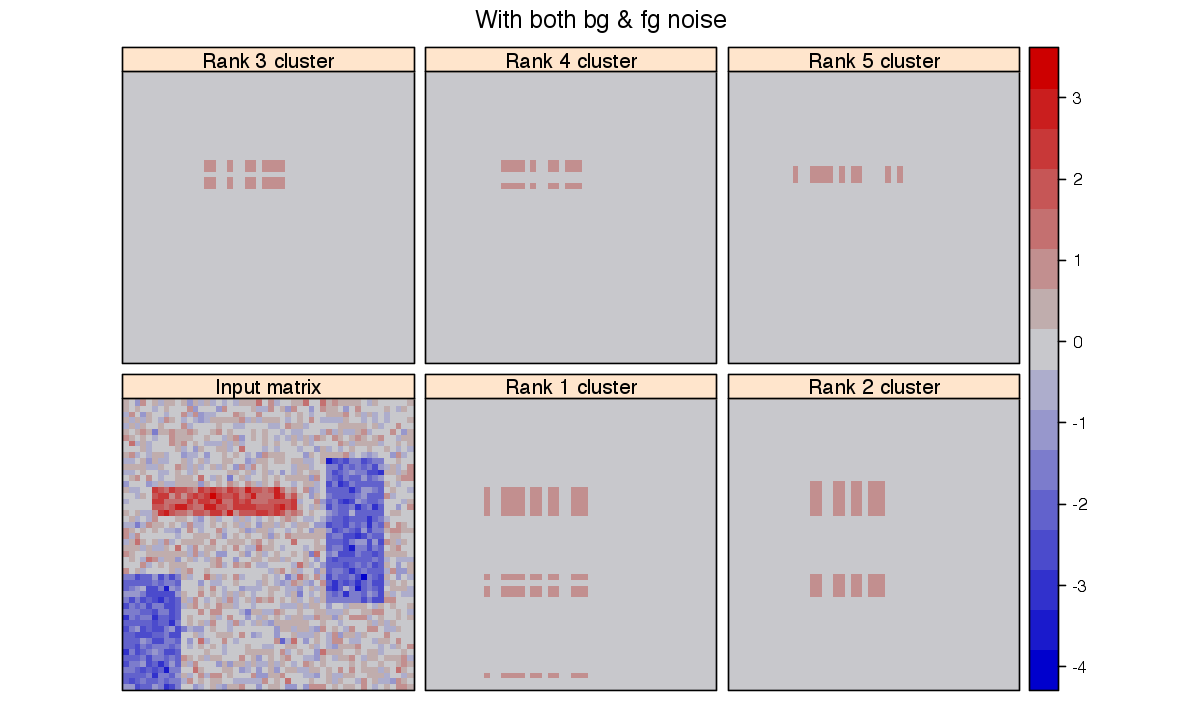

In [13]:
options(repr.plot.width = 10, repr.plot.height = 6)

plot_isa(modules1, mat.noNoise, main = 'No noise')
plot_isa(modules2, mat.bgNoise, main = 'With background noise')
plot_isa(modules3, mat.bfNoise, main = 'With both bg & fg noise')
       

### ISA summary (1)
ISA seem to be able capture non-overlapping clusters. For overlapped clusters, ISA tend to skip the overlapping regions and only capture the non-overlapping regions of the clusters.

But we can take another try to include more complex overlapping patterns.

In [14]:
data2 <- isa.in.silico(200, 200, 6, 
                      mod.row.size = c(10,20,30,40,50,15), mod.col.size = c(50,40,30,20,40, 60), 
                      overlap.row = c(1,5,0,15,0,0), overlap.col = c(10,20,10,0,10,30))

In [ ]:
data2.perm <- data2[[1]][sample(nrow(data2[[1]])), sample(ncol(data2[[1]]))] # permutate the mmatrix

pheatmap(data2[[1]], cluster_rows = F, cluster_cols = F,  main = 'Another simulated matrix')
g1 <- grid.grab()
pheatmap(data2.perm, cluster_rows = F, cluster_cols = F, main = 'Permutated matrix')
g2 <- grid.grab()
pheatmap(data2.perm, main = 'Permutated matrix with hclust')
g3 <- grid.grab()


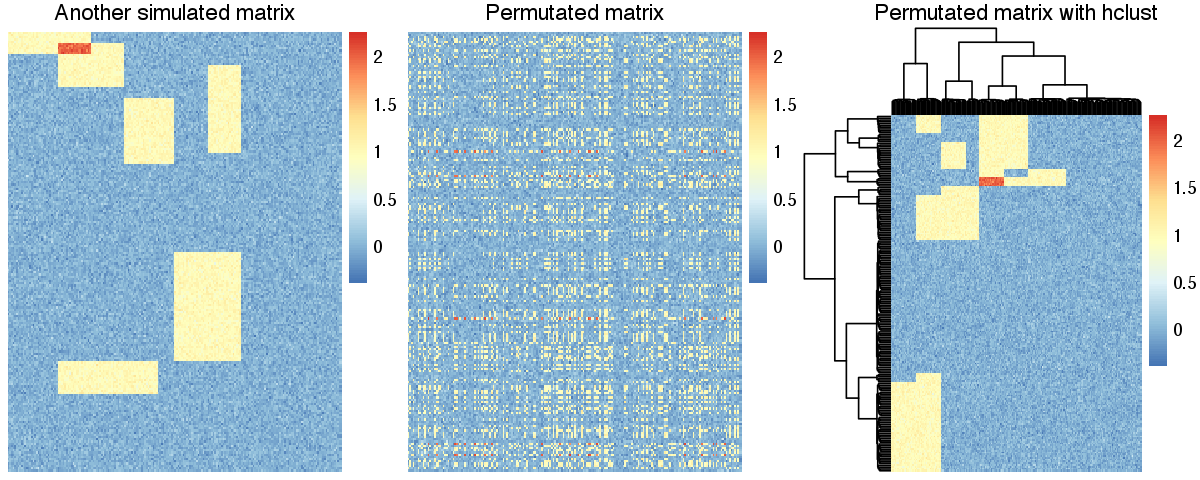

In [6]:
options(repr.plot.width = 10, repr.plot.height = 4)
grid.newpage()
lay <- grid.layout(nrow = 1, ncol = 3)
pushViewport(viewport(layout = lay))
grid.draw(editGrob(g1, vp=viewport(layout.pos.row = 1,layout.pos.col = 1, clip=TRUE)))
grid.draw(editGrob(g2, vp=viewport(layout.pos.row = 1, layout.pos.col = 2, clip=TRUE)))
grid.draw(editGrob(g3, vp=viewport(layout.pos.row = 1, layout.pos.col = 3, clip=TRUE)))
upViewport(1)

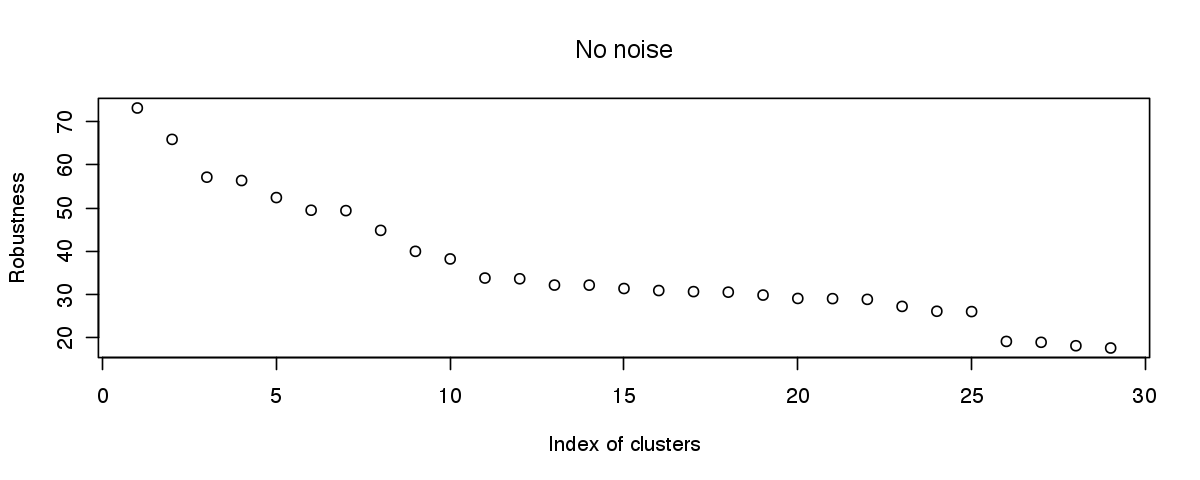

In [7]:
# run isa algorithm
modules4 <- isa(data2[[1]], direction = 'up')

# robustness of clusters
robs4 <- modules4$seeddata$rob

options(repr.plot.width = 10, repr.plot.height = 4)

plot(robs4[order(robs4, decreasing = T)], xlab = 'Index of clusters', ylab = 'Robustness', 
         main = 'No noise')


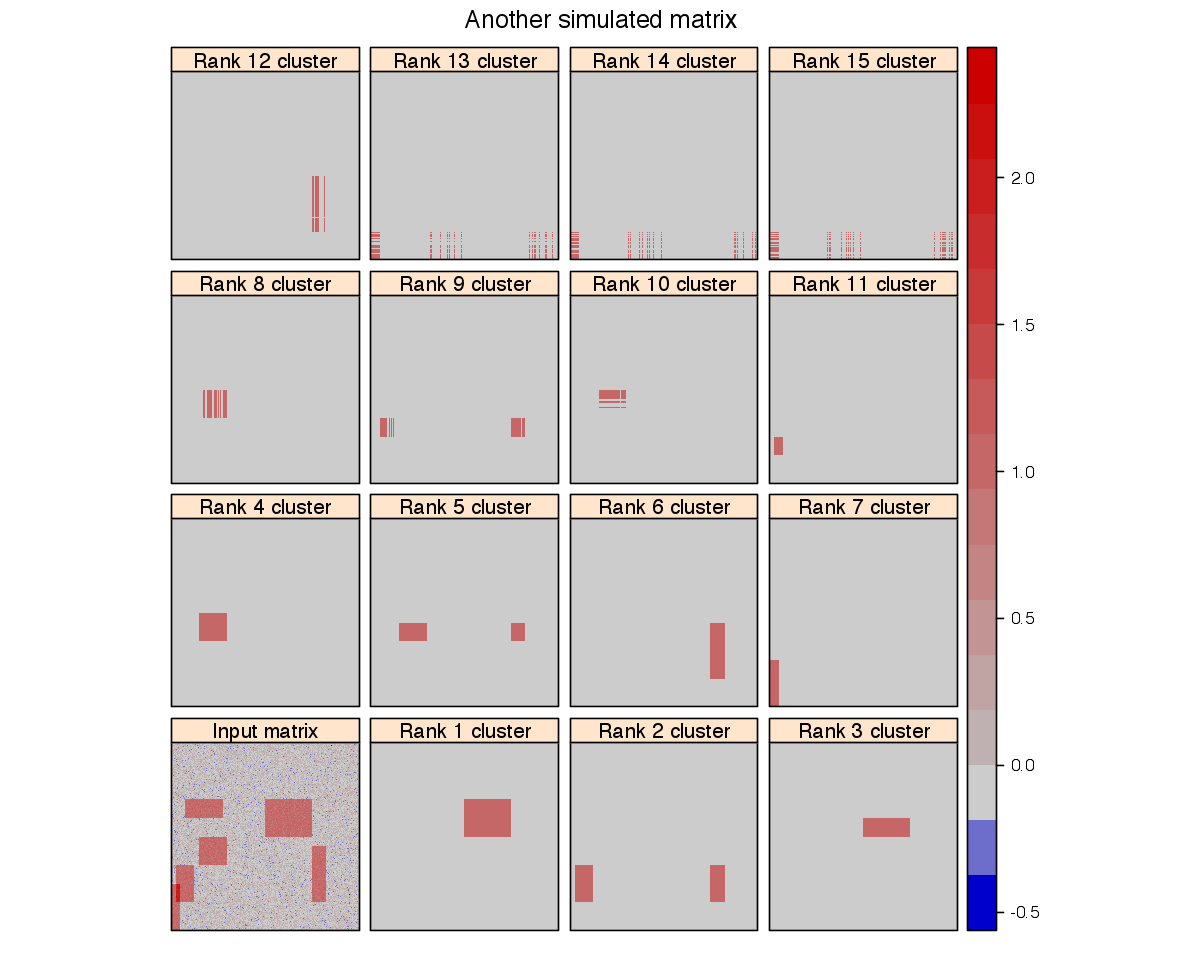

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot_isa(modules4, data2[[1]], num.modules = 15, main = 'Another simulated matrix')


### ISA summary (2)
It seems ISA is able to separate overlapped clusters, but it also report a lot of duplicated clusters. A post-processing step might be added to clean up the result.